In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import datetime
import random

In [2]:
def draw_curve(x,y):
    plot(x,y)

In [3]:
def draw_scatter(x,y):
    scatter(x,y)

In [4]:
def draw_bar(x,h):
    bar(x,h)

In [5]:
def draw_mean_std_bar(label,data):
    mean = np.mean(data,axis=1)
    std = np.std(data,axis=1)
    bar(label,mean,yerr=std)

In [6]:
def draw_hist(x,y):
    hist(y,bins=x)

In [7]:
def draw_boxplot(m):
    fig = figure(1, figsize=(25, 15))
    ax = fig.add_subplot(222)
    ax.boxplot(m.transpose())

In [8]:
def draw_violinplot(data):
    violinplot(data.transpose())

In [9]:
def draw_Bubble_chart(x,y,s):
    scatter(x,y,s)

In [10]:
def read_data(filename = None):
    if filename is None:
        return pd.read_csv('./data/clean/01. Duc/2018-01-25 11:20:00.csv.gz',compression='gzip', sep=';')

In [11]:
# Create dataframes per day during a week
import datetime
import random
df = read_data()
days = np.array([datetime.datetime(2018,1,29,0,0,0) + datetime.timedelta(days=i) for i in range(9)])
firstDay = datetime.datetime(2018,1,29,0,0,0)

dataframe_per_day = []

names_days = np.array(['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche'])

for day in days[1:]:
    df_j = df[df.Timestamp <str(day)]
    df_j = df_j[ df_j.Timestamp >str(firstDay)]
    firstDay = day
    dataframe_per_day.append(df_j)

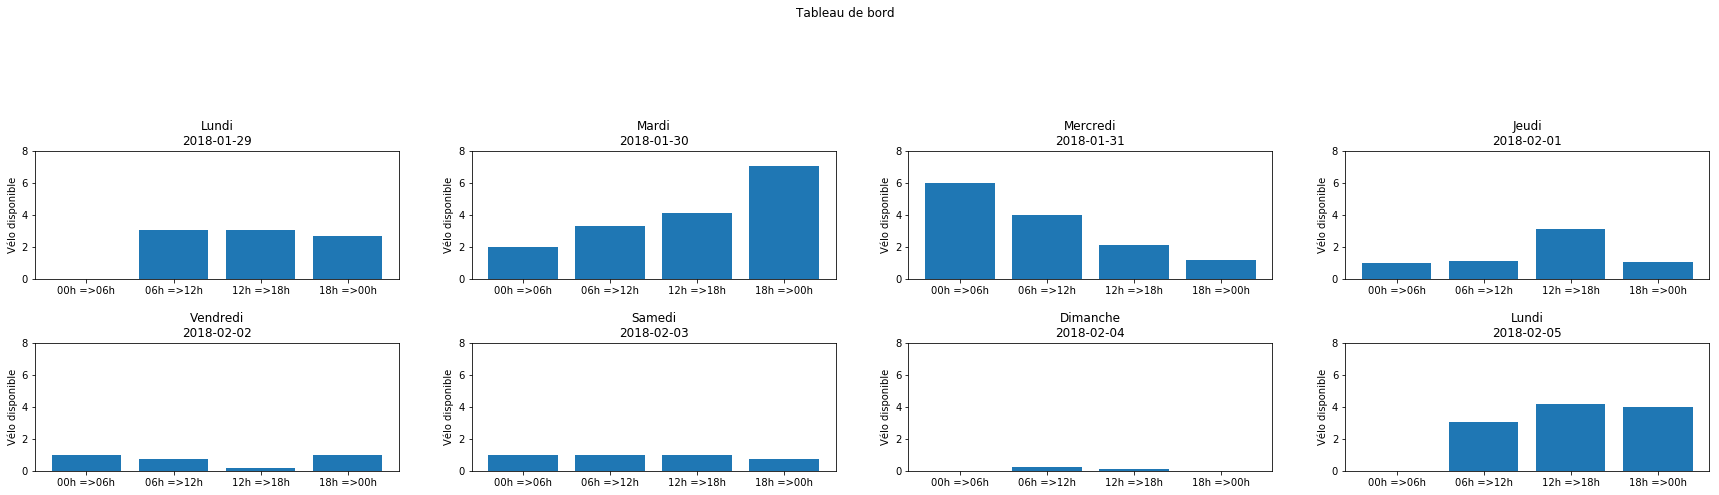

In [12]:
# create dataframe per period in day
figLayout = plt.figure(constrained_layout=False,figsize=(30,20))
gs = figLayout.add_gridspec(6, 4)
plt.gcf().subplots_adjust(hspace = .5)
figLayout.suptitle("Tableau de bord")

for index,df_day in enumerate(dataframe_per_day):

    title = df_day.Timestamp.iloc[0].split()[0]
    
    year = int(df_day.Timestamp.iloc[0].split()[0].split('-')[0])
    month = int(df_day.Timestamp.iloc[0].split()[0].split('-')[1])
    day = int(df_day.Timestamp.iloc[0].split()[0].split('-')[2])

    hours = np.array([datetime.datetime(year,month,day,0,0,0) + datetime.timedelta(hours=i*6) for i in range(5)])
    dataframe_per_period = []

    x = []
    y = []
    for i in range(len(hours)-1):

        x.append(str(hours[i]).split()[1].split(':')[0]+"h =>"+str(hours[i+1]).split()[1].split(':')[0]+"h")

        df_p = df_day[df_day.Timestamp <str(hours[i+1])]
        df_p = df_p[ df_p.Timestamp >str(hours[i])]
        y.append(df_p.Bikes.mean())
        dataframe_per_period.append(df_p)
    
    
    
    fig_ax = figLayout.add_subplot(gs[index//4, index%4])
    #axes[index//4][index%4]
    fig_ax.bar(x, y)
    plt.ylim(bottom=0,top=df.Bikes.max()) 
    #axes[index//4][index%4]
    fig_ax.set_title(names_days[index%7]+"\n"+title)
    #axes[index//4][index%4]
    fig_ax.set_ylabel("Vélo disponible")

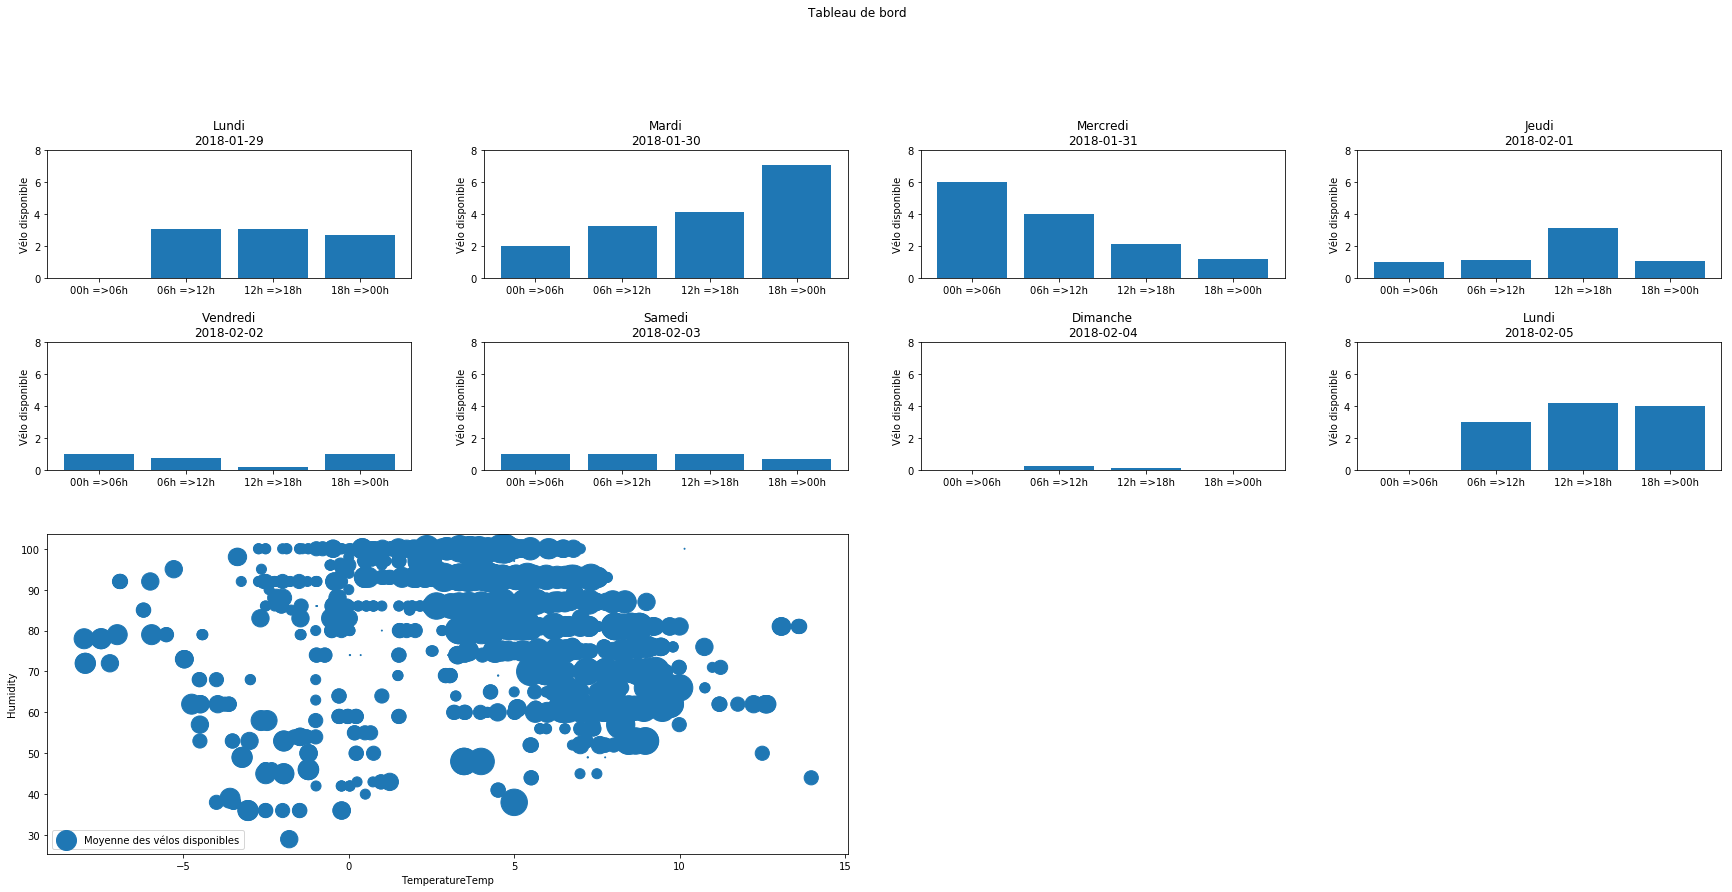

In [13]:
data = df.groupby(['TemperatureTemp','Humidity']).mean().Bikes
data = data.reset_index(level=[0,1])
x = data.TemperatureTemp
y = data.Humidity
z = np.around(data.Bikes)


z = z*100 + 1

fig_ax2 = figLayout.add_subplot(gs[2:4,0:-2])

scatter = fig_ax2.scatter(x,y,s=z,label='Moyenne des vélos disponibles')

fig_ax2.legend( loc="lower left",)
fig_ax2.set_ylabel("Humidity")
fig_ax2.set_xlabel("TemperatureTemp")

figLayout

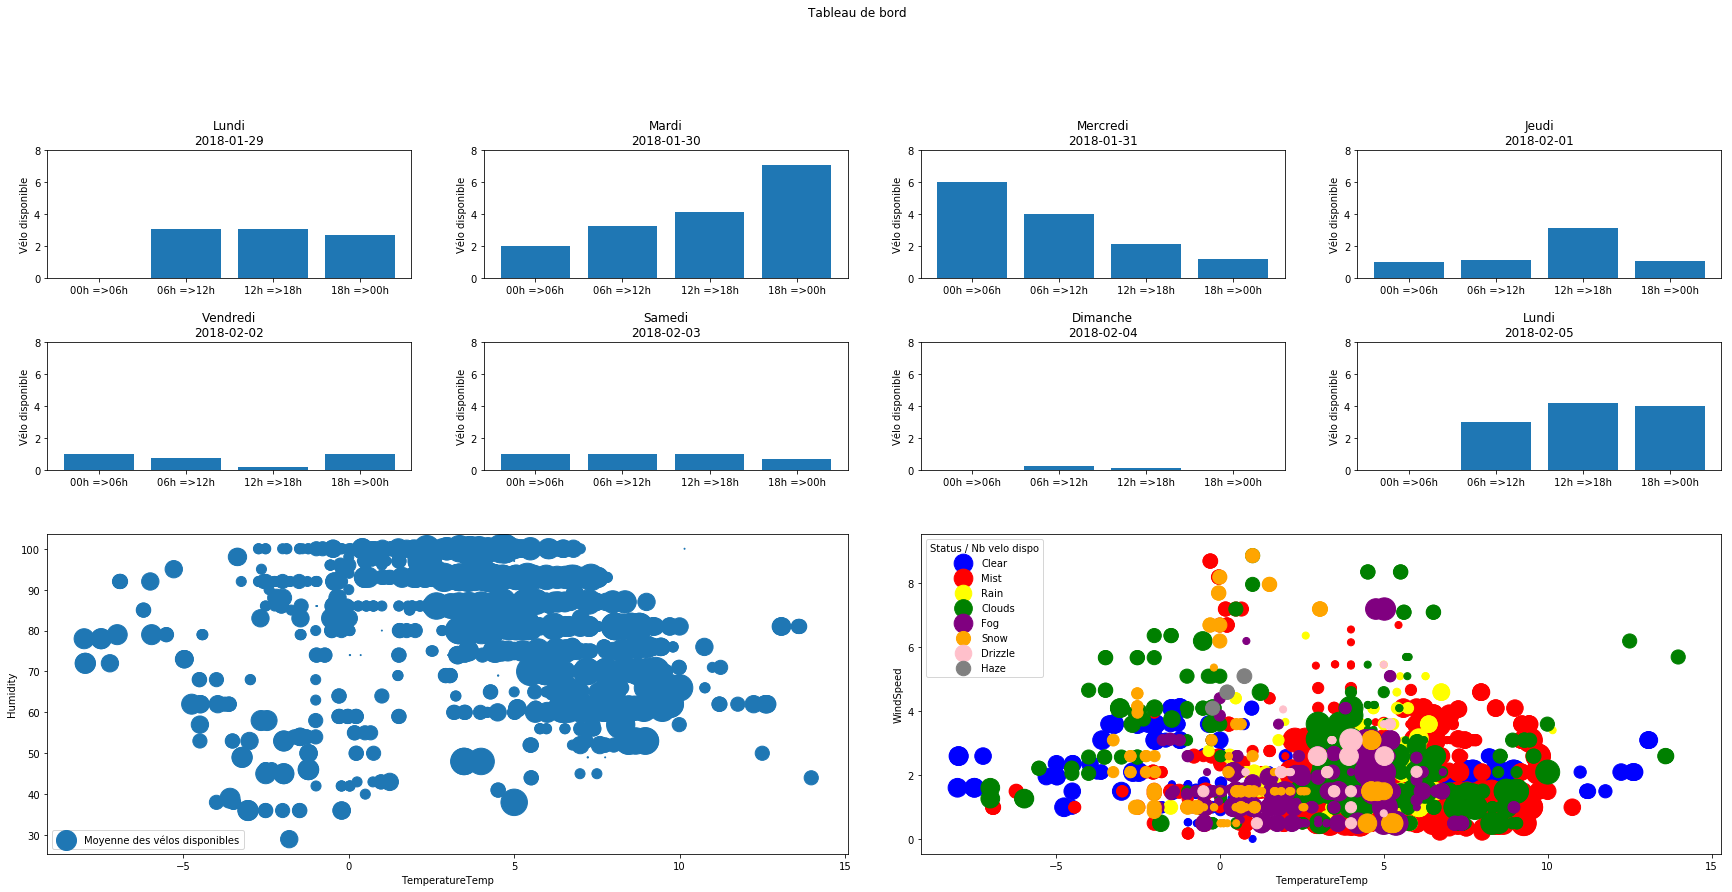

In [14]:
df1 = read_data()
color = ['Blue','Red','Yellow','Green','Purple','Orange','Pink','Gray']

df1 = df1.drop(df1[df1.WindSpeed>25].index)
d = df1.groupby(['WindSpeed','TemperatureTemp','Status']).mean().Bikes.to_frame().reset_index(level=[0,1,2])

fig_ax3 = figLayout.add_subplot(gs[2:4,2:4])
for i,s in enumerate(d.Status.unique()):
    x = d.loc[d.Status==s,'TemperatureTemp']
    y = d.loc[d.Status==s,'WindSpeed']
    z = d.loc[d.Status==s,'Bikes']*75 +50
    fig_ax3.scatter(x,y,z,c=color[i],label=s)
    
fig_ax3.legend(loc="upper left",title='Status / Nb velo dispo')
fig_ax3.set_ylabel("WindSpeed")
fig_ax3.set_xlabel("TemperatureTemp")

figLayout

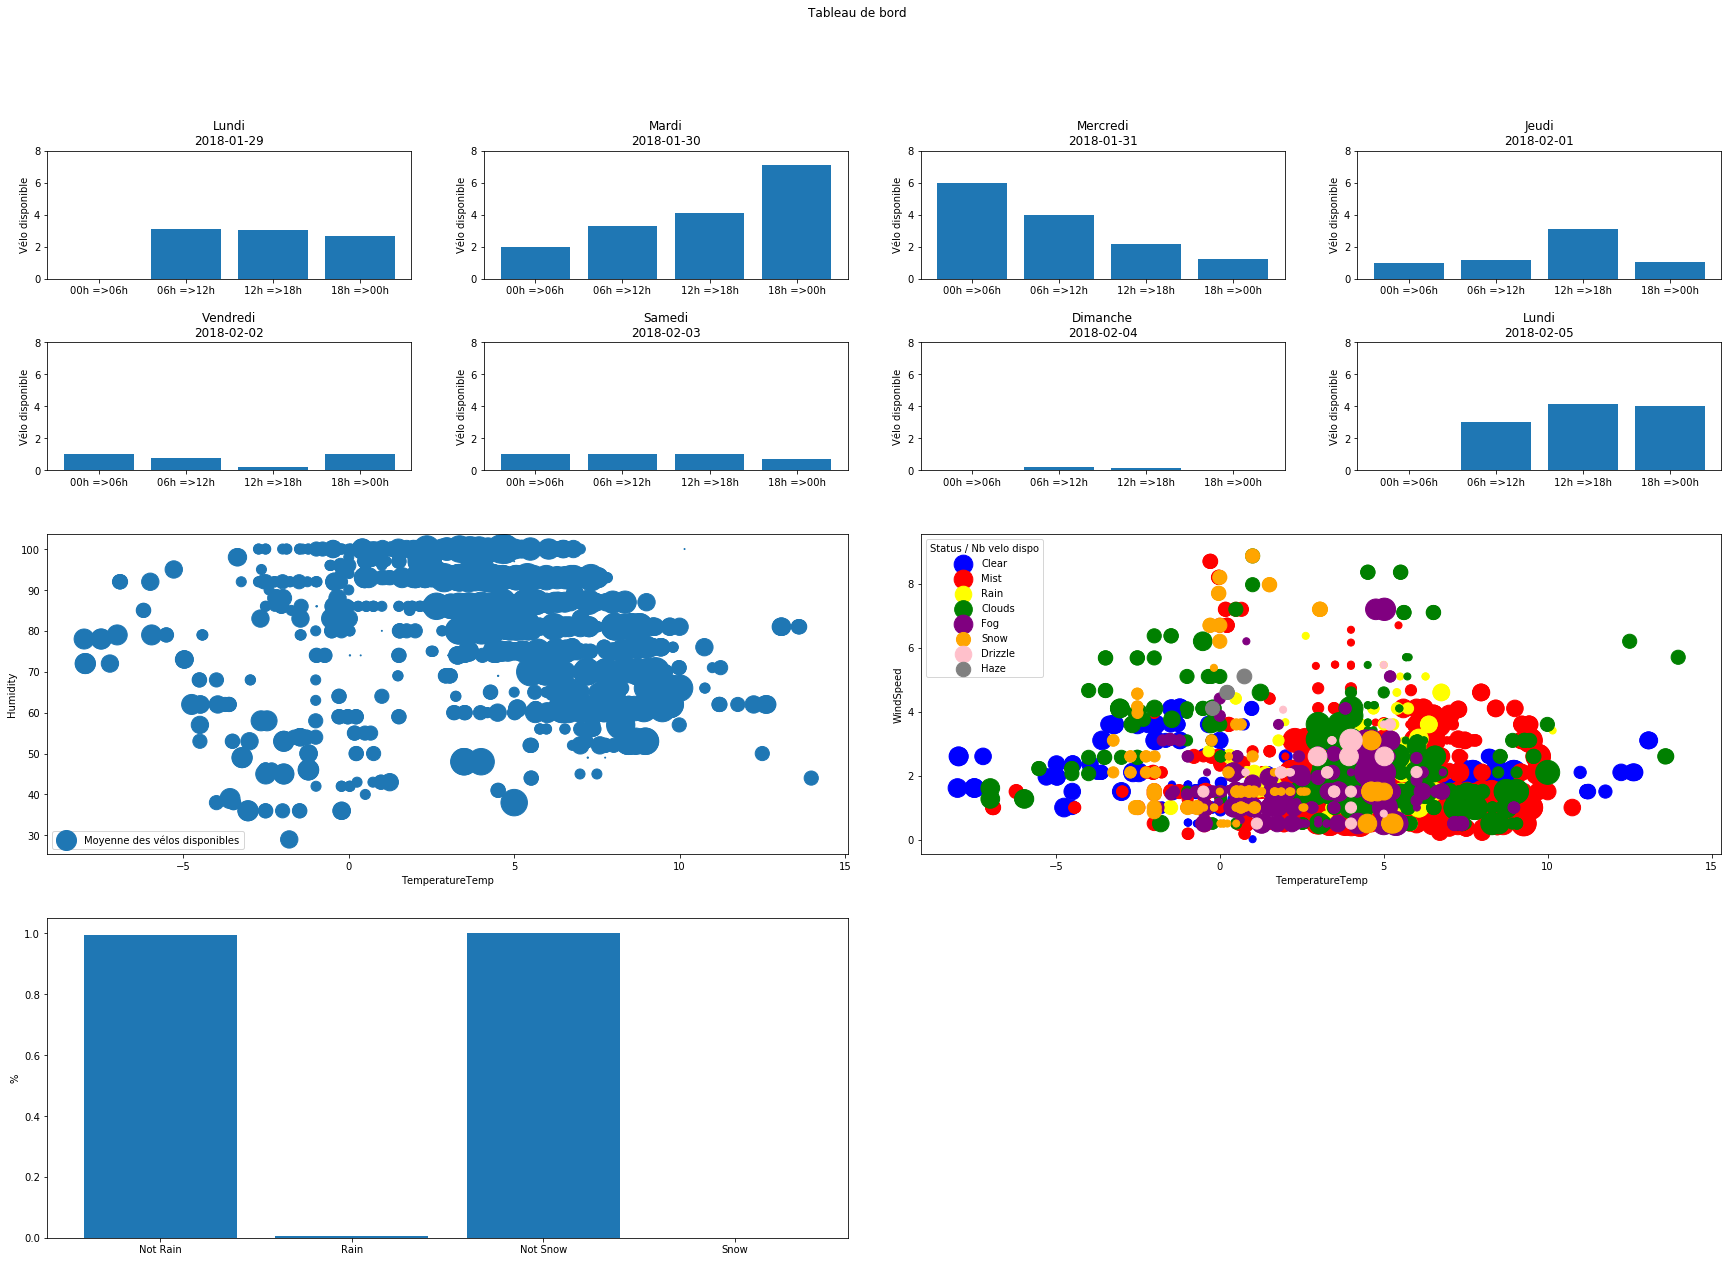

In [15]:
df = read_data()

r = df.Rain != '{}'
s = df.Snow != '{}'

x = ['Not Rain','Rain','Not Snow','Snow']
y = [r.value_counts()[0]/len(df.Rain),
        r.value_counts()[1]/len(df.Rain),
             s.value_counts()[0]/len(df.Snow),
                 s.value_counts()[1] if(len(s.value_counts())>1)else 0/len(df.Snow)]

fig_ax4 = figLayout.add_subplot(gs[4:6,0:-2])

scatter = fig_ax4.bar(x,y)

fig_ax4.set_ylabel("%")

figLayout

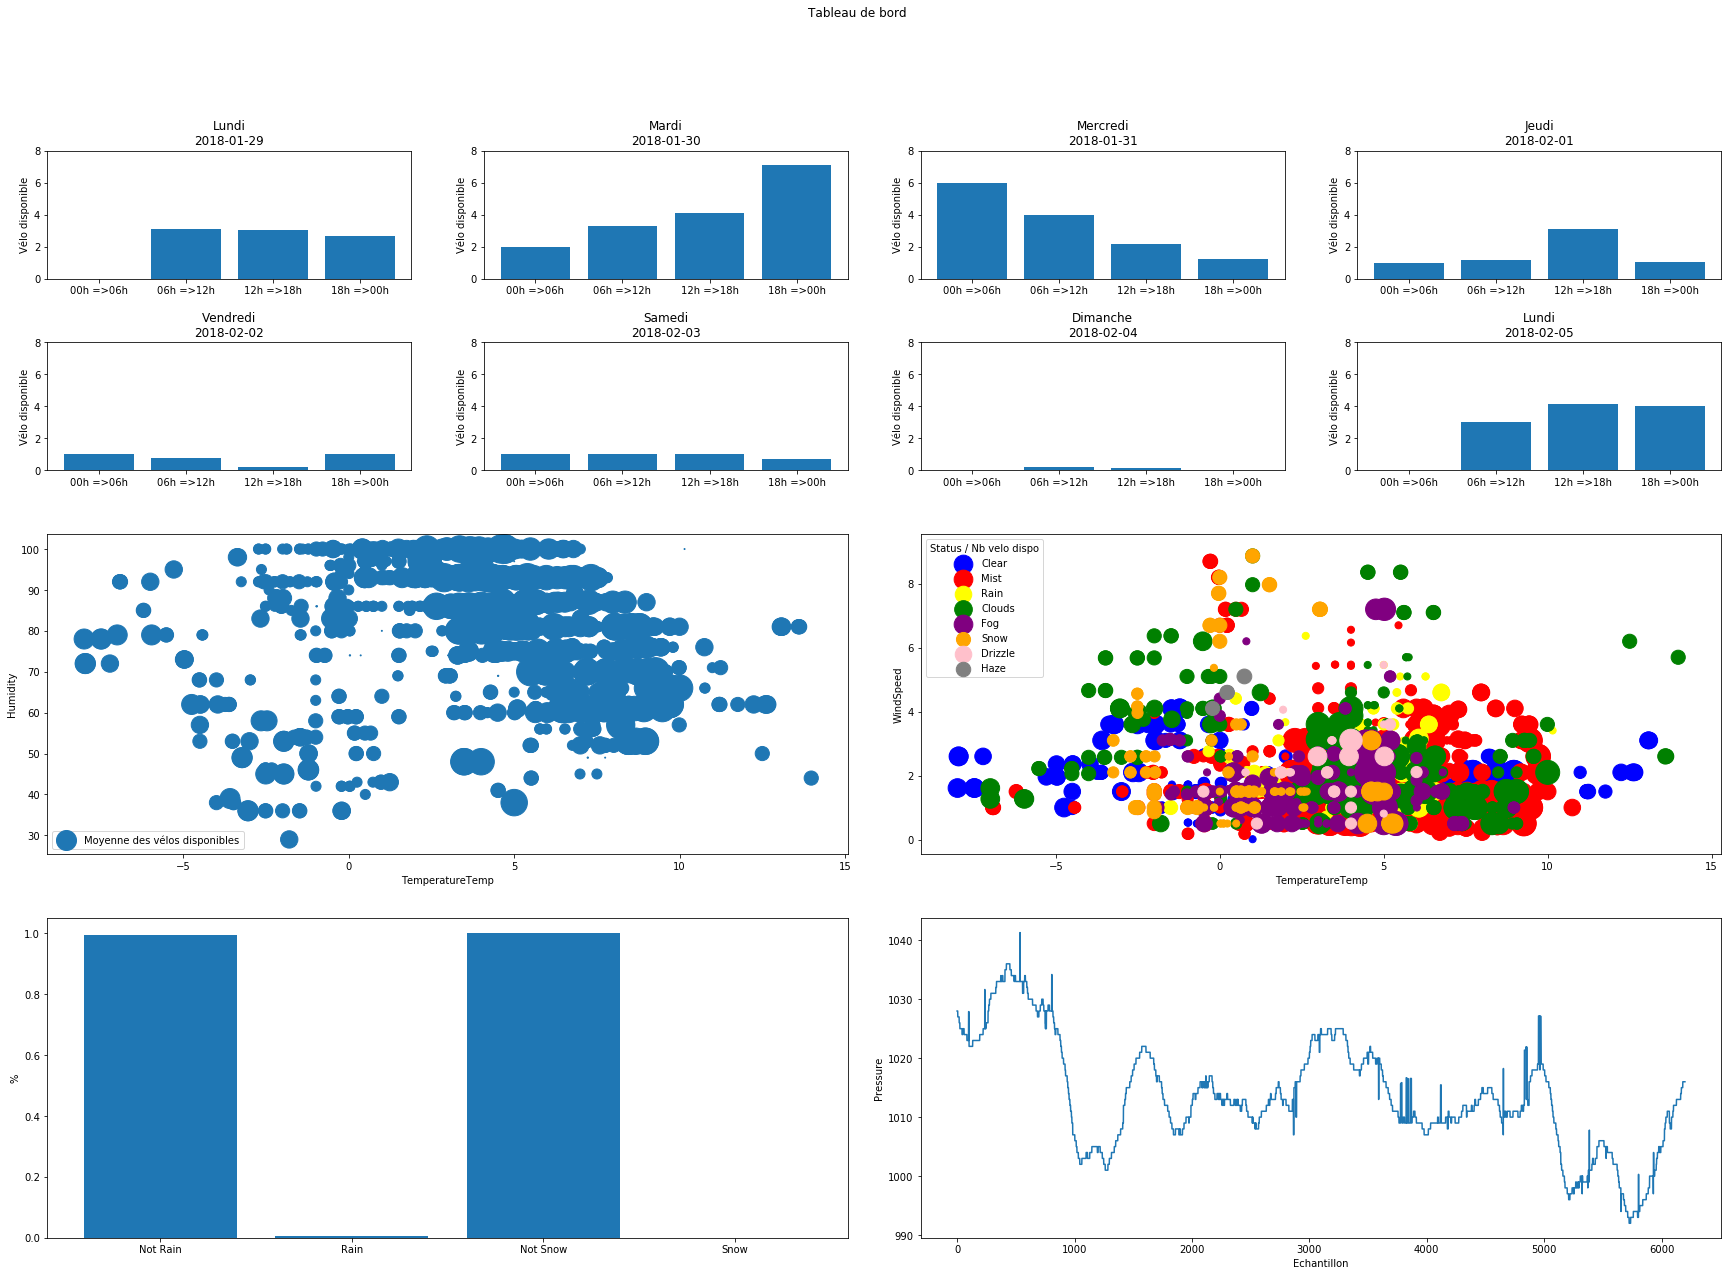

In [16]:
fig_ax5 = figLayout.add_subplot(gs[4:6,2:4])

scatter = fig_ax5.plot(df.index,df.Pressure)

fig_ax5.set_ylabel("Pressure")
fig_ax5.set_xlabel("Echantillon")

figLayout

In [17]:
figLayout.savefig('tableau de bord.png', dpi=100)